In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [54]:
import os

def read_data(base_path, experiment_name):
    return pd.read_json(os.path.join(base_path, experiment_name, 'progress.json'), lines=True)
    
def analyze_experiments(base_path, experiments, x_label, y_label):
    data = {}
    for experiment in experiments:
        data[experiment] = read_data(base_path, experiment)
        
    ax = None
    for name, df in data.items():
        ax = df.plot(x=x_label, y=y_label, ax=ax, label=name, figsize=(15, 10))
    
    leg = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    for line in leg.get_lines():
        line.set_linewidth(4)

In [88]:
base_path = 'results/'

all_doom_exp = os.listdir(base_path)

def get_params(name):
    items = [v.split('=') for v in name.split(',')[1:]]
    return {k: float(v) for k, v in items}

def filter_exp(name):
    params = get_params(name)
    if params['exploration_length'] >= 100000:
        return False
    
    if params["learning_rate"] >= 0.005:
        return False
    
    if params['batch_size'] not in [64, 128, 32]:
        return False
    
    return True

doom_exp = [exp for exp in all_doom_exp if filter_exp(exp)]

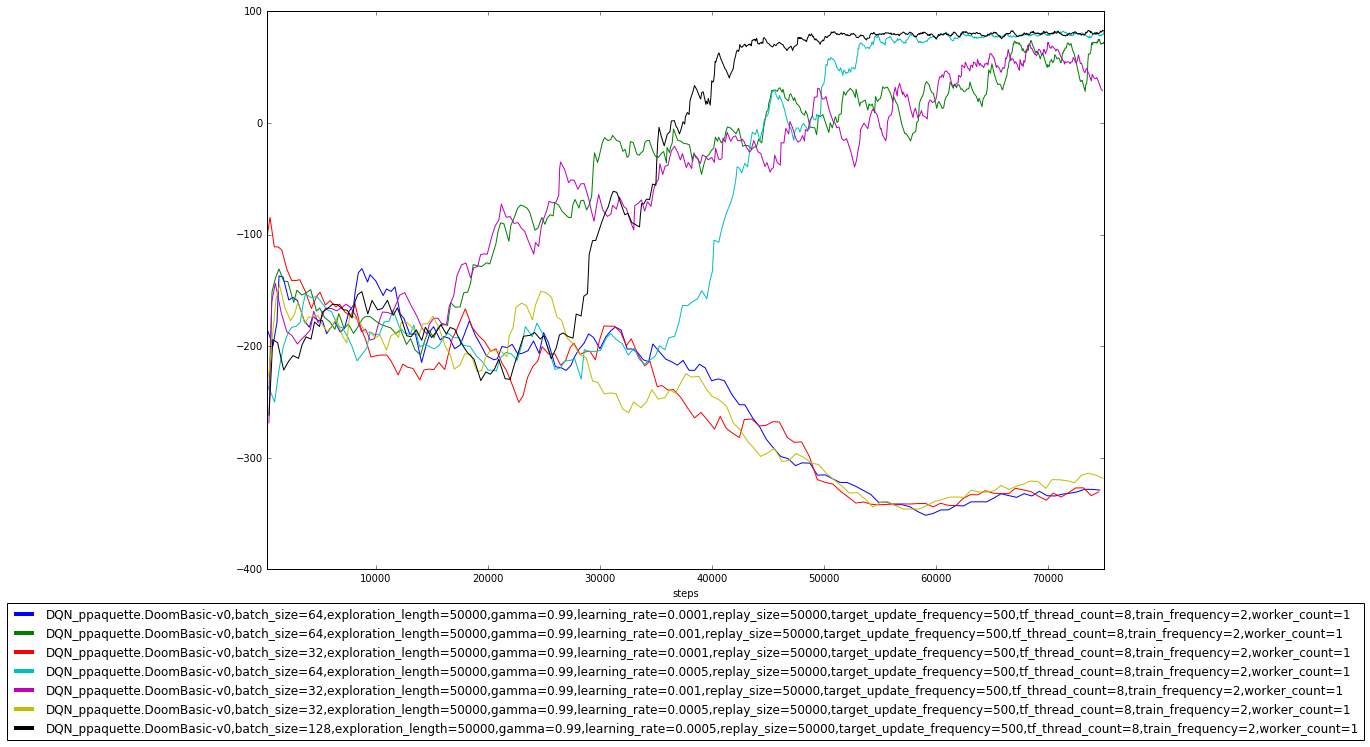

In [89]:
analyze_experiments(base_path, doom_exp, 'steps', 'mean episode reward')

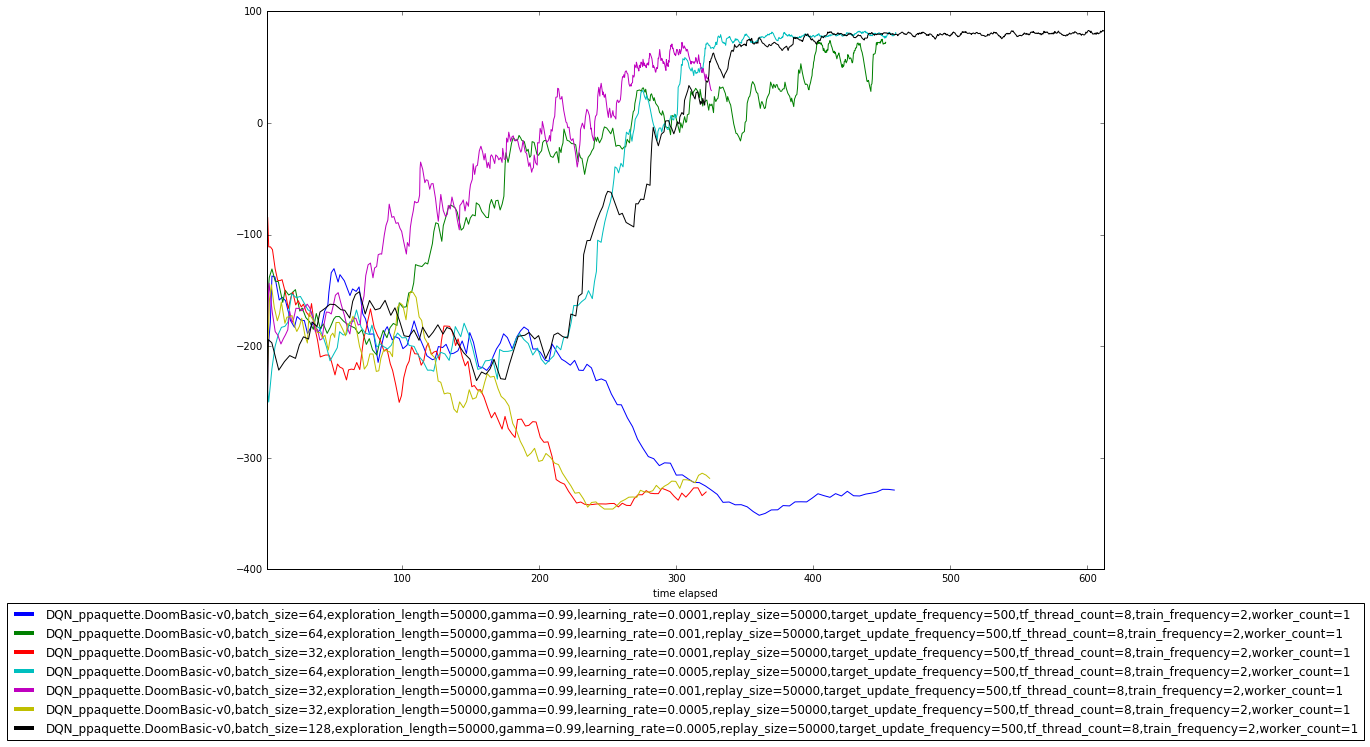

In [90]:
analyze_experiments(base_path, doom_exp, 'time elapsed', 'mean episode reward')

In [91]:
# analyze_experiments(base_path, ['DQN_ppaquette.DoomBasic-v0,batch_size=64,exploration_length=50000,gamma=0.99,learning_rate=0.0005,replay_size=50000,target_update_frequency=500,tf_thread_count=8,train_frequency=2,worker_count=1'], 'steps', 'train_share')